# **Bellabeat | Google Data Analytics Capstone Project**
Helmy Naufal Aziz

# Intorduction
[Bellabeat](http://bellabeat.com/) is a high-tech company that manufactures health-focused smart products. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat co-founder, Urška Sršen, knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. This project will analyze how consumers use non-Bellabeat smart devices.

# Scenario
In this case study, I'm a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. The co-founder believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I've been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide the marketing strategy for the company. 

In this case, I will focus on one of Bellabeat's products, the Bellabeat app. The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

# Method Approach
This project will be analyzed in 6 steps of the analysis process:
1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act

# Step 1: Ask

## Business Task:
Identify some trends in how consumers using smart devices in order to help marketing strategies of Bellabeat's product.

## Key Stakeholders:
### **1. Primary Stakeholders:**
* **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
* **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

### **2. Secondary Stakeholders:**
* **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.

# Step 2: Prepare
## Data Source
This project will use the public data [Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) published by [Mobius](https://www.kaggle.com/arashnic) generated by respondents to a distributed survey via Amazon Mechanical Turk between 04/12/2016 - 05/12/2016 under [CC0: Public Domain license](https://creativecommons.org/publicdomain/zero/1.0/). This dataset explores smart device users' daily habits from thirty eligible Fitbit, users who consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate and sleep monitoring.

## Data Summary
I used Google Sheets to get the summary of the datasets. The datasets have 18 tables, 15 tables in long format and 3 tables in wide format. It consists of information from calories burnt, heart rate, steps, and sleep quality to weight, over periods of daily, hourly, and per minute. In this project, I will use only the daily information data to analyze the day-to-day activity of users.

## Data Credibility
Good data can be determined by identifying whether the data is reliable, original, comprehensive, current and cited. If the data is not included those values, the data could be biased or have credibility issues. 

There are some credibility isssues on the data, including:
- **The data was outdated**, the data collected was from 04/12/2016 to 05/12/2016 which is not relevant to the current situation. 
- **The data was not completed**, there is no demographic data collected, like gender, location, and age, which make the data bias even higher.
- **Small sample data size**, the data were collected only during the 31 days from 33 sample users.

Since the data have many credibility issues, it needs to collect more additional data to fix the issues. However, it takes a lot of time and resources. Therefore in this case study, those issues would be the data limitation.

# Step 3: Process
Several tools can use from this step onward, like Spreadsheet, SQL, and R. I decided to use R because it has a variety of functions in packages to perform tasks like data cleaning, analysis, and visualization. This step will include importing datasets, verifying data integrity, and removing duplicates and missing values.

## Collecting Dataset
* ### Loading Packages
Here are the packages used in this case study:

In [1]:
library(tidyverse) # for data import and wrangling
library(lubridate) # for date functions
library(ggplot2) # for data visualization
library(ggrepel) # for data visualization
library(janitor) # for data cleaning
library(grid) # for arange grid
library(gridExtra) # for arrange grid
library(ggpubr) # for calculation

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




* ### Collect Dataset
As I mentioned above, this project will use a daily timeframe. There are 6 tables containing daily timeframes.

In [2]:
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

## Data Integrity
This step will verify the data integrity such as the accuracy, completeness, consistency, and trustworthiness of the data. First, I will compare all the dataset columns to see whether the data have issues or not.

In [3]:
compare_df_cols(daily_activity, daily_calories, daily_intensities, daily_steps, daily_sleep, weight_log)

column_name,daily_activity,daily_calories,daily_intensities,daily_steps,daily_sleep,weight_log
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ActivityDate,character,NA,NA,NA,NA,NA
ActivityDay,NA,character,character,character,NA,NA
BMI,NA,NA,NA,NA,NA,numeric
Calories,integer,integer,NA,NA,NA,NA
Date,NA,NA,NA,NA,NA,character
FairlyActiveMinutes,integer,NA,integer,NA,NA,NA
Fat,NA,NA,NA,NA,NA,integer
Id,numeric,numeric,numeric,numeric,numeric,numeric
IsManualReport,NA,NA,NA,NA,NA,character


From the table above, there are several things we found:
- Some tables like `daily_calories`, `daily_intensities` and `daily_steps` seems to have a similar column with `daily_activity`. 
- Validate the columns, whether they have the same value or not by using the `identical()` function. 
- The column containing the date has a `character` class and the column has different naming. Convert the columns into a `datetime` class and rename them.
- The column names used Upper Camel Case. The `clean_names()` function can change the format naming to make it more convenient to use lowercase and underscore.
- `Id` column has a numeric class whereas it should be a character class.

In [4]:
# validating daily_activity and daily_calories
identical(daily_activity$Id, daily_calories$Id)
identical(daily_activity$ActivityDay, daily_calories$ActivityDate)

# validating daily_activity and daily_intensities
identical(daily_activity$Id, daily_intensities$Id)
identical(daily_activity$ActivityDay, daily_intensities$ActivityDate)

# validating daily_activity and daily_steps
identical(daily_activity$Id, daily_steps$Id)
identical(daily_activity$ActivityDay, daily_steps$ActivityDate)

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

It showed that `daily_calories`, `daily_intensities` and `daily_steps` tables have identic value to `daily_activity` tables. So, we can focused only on the `daily_activity`, `daily_sleep` and `weight_log` tables. Next, I'll rename the column names then convert the columns format that containing date.

In [5]:
# change column class
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, format = "%m/%d/%Y")
daily_sleep$SleepDay <- as.Date(daily_sleep$SleepDay, format = "%m/%d/%Y")
weight_log$Date <- as.Date(weight_log$Date, format = "%m/%d/%Y")
daily_activity$Id <- as.character(daily_activity$Id)
daily_sleep$Id <- as.character(daily_sleep$Id)
weight_log$Id <- as.character(weight_log$Id)

In [6]:
# rename column name
daily_activity <- rename(daily_activity, Date=ActivityDate)
daily_sleep <- rename(daily_sleep, Date=SleepDay)

In [7]:
# change naming format
daily_activity <- clean_names(daily_activity)
daily_sleep <- clean_names(daily_sleep)
weight_log <- clean_names(weight_log)

## Data Cleaning

### Inspecting Data Structure
Let's check take a glimpse of each data structure of each table by using the `glimpse()` function. 

In [8]:
glimpse(daily_activity)
glimpse(daily_sleep)
glimpse(weight_log)

Rows: 940
Columns: 15
$ id                         <chr> "1503960366", "1503960366", "1503960366", "…
$ date                       <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ total_steps                <int> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3…
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1…
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,…
$ fairly_active_minutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, …
$ lightly_active_m

We could see the total rows, columns, column format, and some of the data values of each column. Let's check the distinct value we have so we know exactly how many users and the period of the data.

In [9]:
# checking distinct value
n_distinct(daily_activity$id)
n_distinct(daily_sleep$id)
n_distinct(weight_log$id)

n_distinct(daily_activity$date)
n_distinct(daily_sleep$date)
n_distinct(weight_log$date)

[1] 33

[1] 24

[1] 8

[1] 31

[1] 31

[1] 31

It showed that 33 users recorded their daily activity, 24 users recorded their sleep and 8 users recorded their weight. All the data have 31 day tracking period.

### Removing Duplicates and Missing Values
Duplicates might decrease the quality of data, therefore it needs to find and remove. First, let's find how many duplicates and missing values we have on the data. I use `sum(duplicated())` function to find the duplicates and use `colSums(is.na())` function to find missing value.

In [10]:
# find duplicates
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(weight_log))

[1] 0

[1] 3

[1] 0

In [11]:
# find missing value
colSums(is.na(daily_activity))
colSums(is.na(daily_sleep))
colSums(is.na(weight_log))

id                       date 
                         0                          0 
               total_steps             total_distance 
                         0                          0 
          tracker_distance logged_activities_distance 
                         0                          0 
      very_active_distance moderately_active_distance 
                         0                          0 
     light_active_distance  sedentary_active_distance 
                         0                          0 
       very_active_minutes      fairly_active_minutes 
                         0                          0 
    lightly_active_minutes          sedentary_minutes 
                         0                          0 
                  calories 
                         0

id                 date  total_sleep_records 
                   0                    0                    0 
total_minutes_asleep    total_time_in_bed 
                   0                    0

id             date        weight_kg    weight_pounds 
               0                0                0                0 
             fat              bmi is_manual_report           log_id 
              65                0                0                0

There are 3 duplicates found in the `daily_sleep` tables and 65 missing values in the fat column of the `weight_log` tables. Since weight_log tables have 67 total rows and there are 65 missing values on the fat column, I decided to remove the fat column also the duplicates.

In [12]:
# removing column
weight_log <- subset(weight_log, select = -c(fat))
colnames(weight_log)

# removing duplicates row
nrow(daily_sleep)
daily_sleep <- daily_sleep[!duplicated(daily_sleep),]
nrow(daily_sleep)

[1] "id"               "date"             "weight_kg"        "weight_pounds"   
[5] "bmi"              "is_manual_report" "log_id"

[1] 413

[1] 410

## Combining Data
It's more convenient and effective if we use only a single dataset. Fortunately, the data have common columns` id` and `date`, therefore I can combine this dataset into a single file. First, let's take look at the data.

In [13]:
head(daily_activity)
head(daily_sleep)
head(weight_log)
# filter(daily_activity, logged_activities_distance > 0)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
,<chr>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<chr>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


,id,date,weight_kg,weight_pounds,bmi,is_manual_report,log_id
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1503960366,2016-05-02,52.6,115.9631,22.65,True,1.462234e+12
2,1503960366,2016-05-03,52.6,115.9631,22.65,True,1.462320e+12
3,1927972279,2016-04-13,133.5,294.3171,47.54,False,1.460510e+12
4,2873212765,2016-04-21,56.7,125.0021,21.45,True,1.461283e+12
5,2873212765,2016-05-12,57.3,126.3249,21.69,True,1.463098e+12
6,4319703577,2016-04-17,72.4,159.6147,27.45,True,1.460938e+12


I will combine the `daily_sleep` and `weight_log` tables with the `daily_activity` table. Here, I will take `total_minutes_asleep` and `total_time_in_bed` column from `daily_sleep`  table also `weight_kg` and `bmi` column from `weight_log` table.

In [14]:
user_activity <- merge(daily_activity, daily_sleep%>%select(-total_sleep_records), by=c("id","date"), all.x=TRUE)
user_activity <- merge(user_activity, weight_log%>%select(-c(weight_pounds,is_manual_report,log_id)), by=c("id","date"), all.x=TRUE)

Notice that the data from those 3 tables have different user totals which might cause some rows to have NA values. Let's check the data first.

In [15]:
nrow(daily_activity)
nrow(daily_sleep)
nrow(weight_log)
nrow(user_activity)
colSums(is.na(user_activity))

[1] 940

[1] 410

[1] 67

[1] 940

id                       date 
                         0                          0 
               total_steps             total_distance 
                         0                          0 
          tracker_distance logged_activities_distance 
                         0                          0 
      very_active_distance moderately_active_distance 
                         0                          0 
     light_active_distance  sedentary_active_distance 
                         0                          0 
       very_active_minutes      fairly_active_minutes 
                         0                          0 
    lightly_active_minutes          sedentary_minutes 
                         0                          0 
                  calories       total_minutes_asleep 
                         0                        530 
         total_time_in_bed                  weight_kg 
                       530                        873 
                       bmi 
                       873

From the data shown above, we can see that the total rows which have NA value are the aggregate of the new table with the old one. It means that the NA value comes from users who didn't record their `daily sleep` and `weight log`. I decided to assign 0 to the NA value instead to remove them which indicates that the users didn't record the activity.

In [16]:
user_activity[is.na(user_activity)] <- 0
colSums(is.na(user_activity))

id                       date 
                         0                          0 
               total_steps             total_distance 
                         0                          0 
          tracker_distance logged_activities_distance 
                         0                          0 
      very_active_distance moderately_active_distance 
                         0                          0 
     light_active_distance  sedentary_active_distance 
                         0                          0 
       very_active_minutes      fairly_active_minutes 
                         0                          0 
    lightly_active_minutes          sedentary_minutes 
                         0                          0 
                  calories       total_minutes_asleep 
                         0                          0 
         total_time_in_bed                  weight_kg 
                         0                          0 
                       bmi 
                         0

In [17]:
head(user_activity)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_minutes_asleep,total_time_in_bed,weight_kg,bmi
,<chr>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,327,346,0,0
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,384,407,0,0
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,0,0,0,0
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,412,442,0,0
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,340,367,0,0
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,700,712,0,0


Great! Now the duplicates and missing values have already been removed and we got a single clean data.

# Step 4: Analyze

After cleaning the data, this step will transform data to identify trends and discover the relationship between each variable.

## User Type Distribution
Since the data don't have any demographic variables, I want to determine the type of uses the data have. I classified the user type based on usage time and average steps.

### User Distribution Based on Usage Time
First, I will classify the user type by how many days they tracked their activities during 31 days. I categorized the users into 3 types:
* **Low Usage**, tracked their activities for more than 20 days
* **Moderate Usage**, tracked their activities 11 – 20 days
* **High Usage**, tracked their activities in less than 10 days

In [18]:
write.csv(user_activity,"Bellabeats.csv", row.names = FALSE)

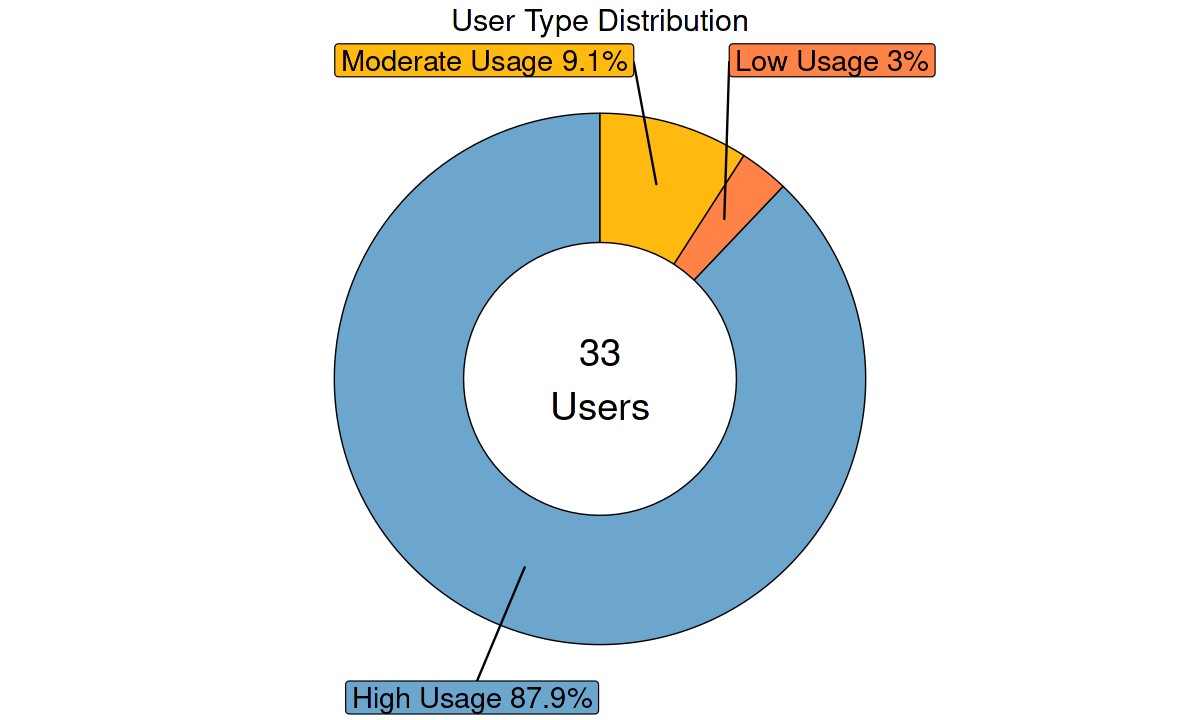

In [19]:
frequency <- user_activity %>%
                group_by(id) %>%
                summarize(n_freq = n(),
                          user_type = case_when(n_freq > 20 ~ "High Usage", 
                                                n_freq > 10 ~ "Moderate Usage", 
                                                TRUE ~ "Low Usage"))
# frequency$user_type = ordered(frequency$user_type, levels = c("High Usage","Moderate Usage","Low Usage"))
options(repr.plot.width = 10, repr.plot.height = 6)
frequency %>%
    group_by(user_type) %>%
    summarize(n_user = n(), 
              percentage = round(n_user / nrow(frequency) * 100, 1)) %>%
    mutate(csum = rev(cumsum(rev(percentage))),
           pos = percentage/2 + lead(csum,n=1),
           pos = if_else(is.na(pos), percentage/2, pos)) %>%
    ggplot(aes(x=1.5, y=percentage, fill=user_type)) +
    geom_col(color="black", size=0.3) +
    coord_polar(theta = "y") +
    xlim(c(0.1, 2)) +
    geom_label_repel(aes(y = pos, label = paste(user_type, paste(percentage, "%", sep=""), sep=" ")), 
                     size = 6, nudge_x = c(1,3,1), nudge_y = c(0,1,-10), show.legend = FALSE,
                     segment.color="black") +
    labs(title = "User Type Distribution") +
    theme_void() +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15), legend.position = "none") +
    scale_fill_manual(values = c("skyblue3", "sienna1", "darkgoldenrod1")) +
    annotate("text", x = 0.1, y = 0, label = "33\nUsers", size=8)


Key takeaways:
- More than 85% of users user tracked their activity over 20 days.

### User Distribution by Average Steps
Next, I will classify the user type by average steps each day. Tudor-Locke and Bassett (2004) proposed physical activity classification by the number of steps per day. They classified as follows:
* **Sedentary**, total steps per day < 5000 steps
* **Low Active**, total steps per day 5000 - 7499 steps
* **Somewhat Active**, total steps per day 7500 - 9999 steps
* **Active**, total steps per day 10000 - 12499 steps
* **Highly Active**, steps per day >12500

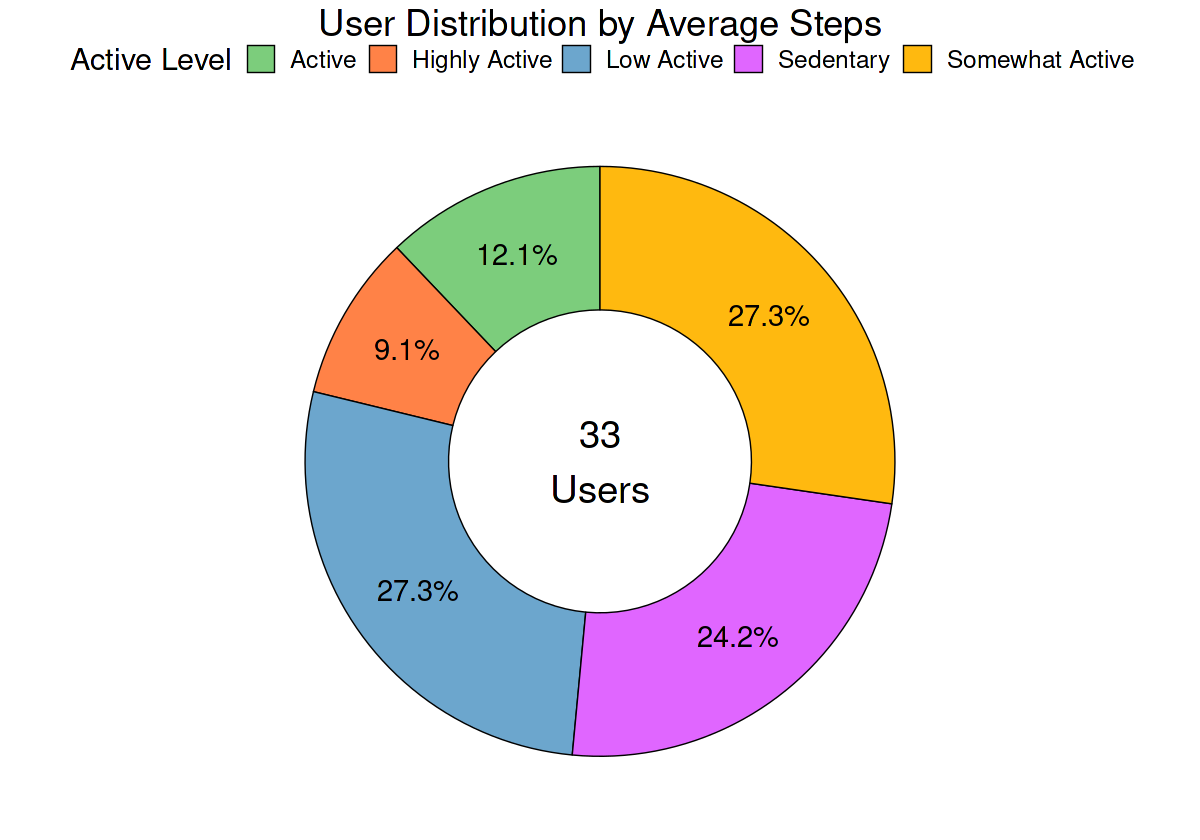

In [20]:
options(repr.plot.width = 10, repr.plot.height = 7)
user_activity %>%
    group_by(id) %>%
    summarize(avg_steps = mean(total_steps), 
    user_type = case_when(avg_steps <5000 ~ "Sedentary",
                          avg_steps <7500 ~ "Low Active",
                          avg_steps <10000 ~ "Somewhat Active",
                          avg_steps <12000 ~ "Active", 
                          TRUE ~ "Highly Active"))  %>%
    group_by(user_type) %>%
    summarize(num_user = n()) %>%
    mutate(percentage = round(num_user / sum(num_user) * 100, 1)) %>%
    ggplot(aes(x=1.5,y=percentage, fill=user_type)) +
    geom_col(color="black", size=0.3)+
    coord_polar(theta="y") +
    xlim(c(0.1, 2)) +
    geom_text(aes(label = paste(percentage, "%", sep="")),
              position = position_stack(vjust = 0.5), size = 6, color = "black") +
    labs(title = "User Distribution by Average Steps", fill= "Active Level") +
    theme_void() +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 18), legend.position = "top") +
    scale_fill_manual(values = c("palegreen3", "sienna1", "skyblue3", "mediumorchid1", "darkgoldenrod1")) +
    annotate("text", x = 0.1, y = 0, label = "33\nUsers", size=8)


Key takeaways:
- There are only a fifth of users have more than 10,000 average steps

## Day-to-day Activity
Let's check how's user activity each day. First, I will add a column `day_of_week` and assign the day based on the `date` column.

In [21]:
user_activity$day_of_week <- format(as.Date(user_activity$date), "%a")
user_activity$day_of_week <- ordered(user_activity$day_of_week, levels=c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))

In [22]:
head(user_activity)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_minutes_asleep,total_time_in_bed,weight_kg,bmi,day_of_week
,<chr>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,327,346,0,0,Tue
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,384,407,0,0,Wed
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,0,0,0,0,Thu
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,412,442,0,0,Fri
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,340,367,0,0,Sat
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,700,712,0,0,Sun


### Average Intensity Levels
There are 4 types of activity levels in the table.  I will summarize the tables by the average of active minutes and see which activity levels have the highest average minutes.

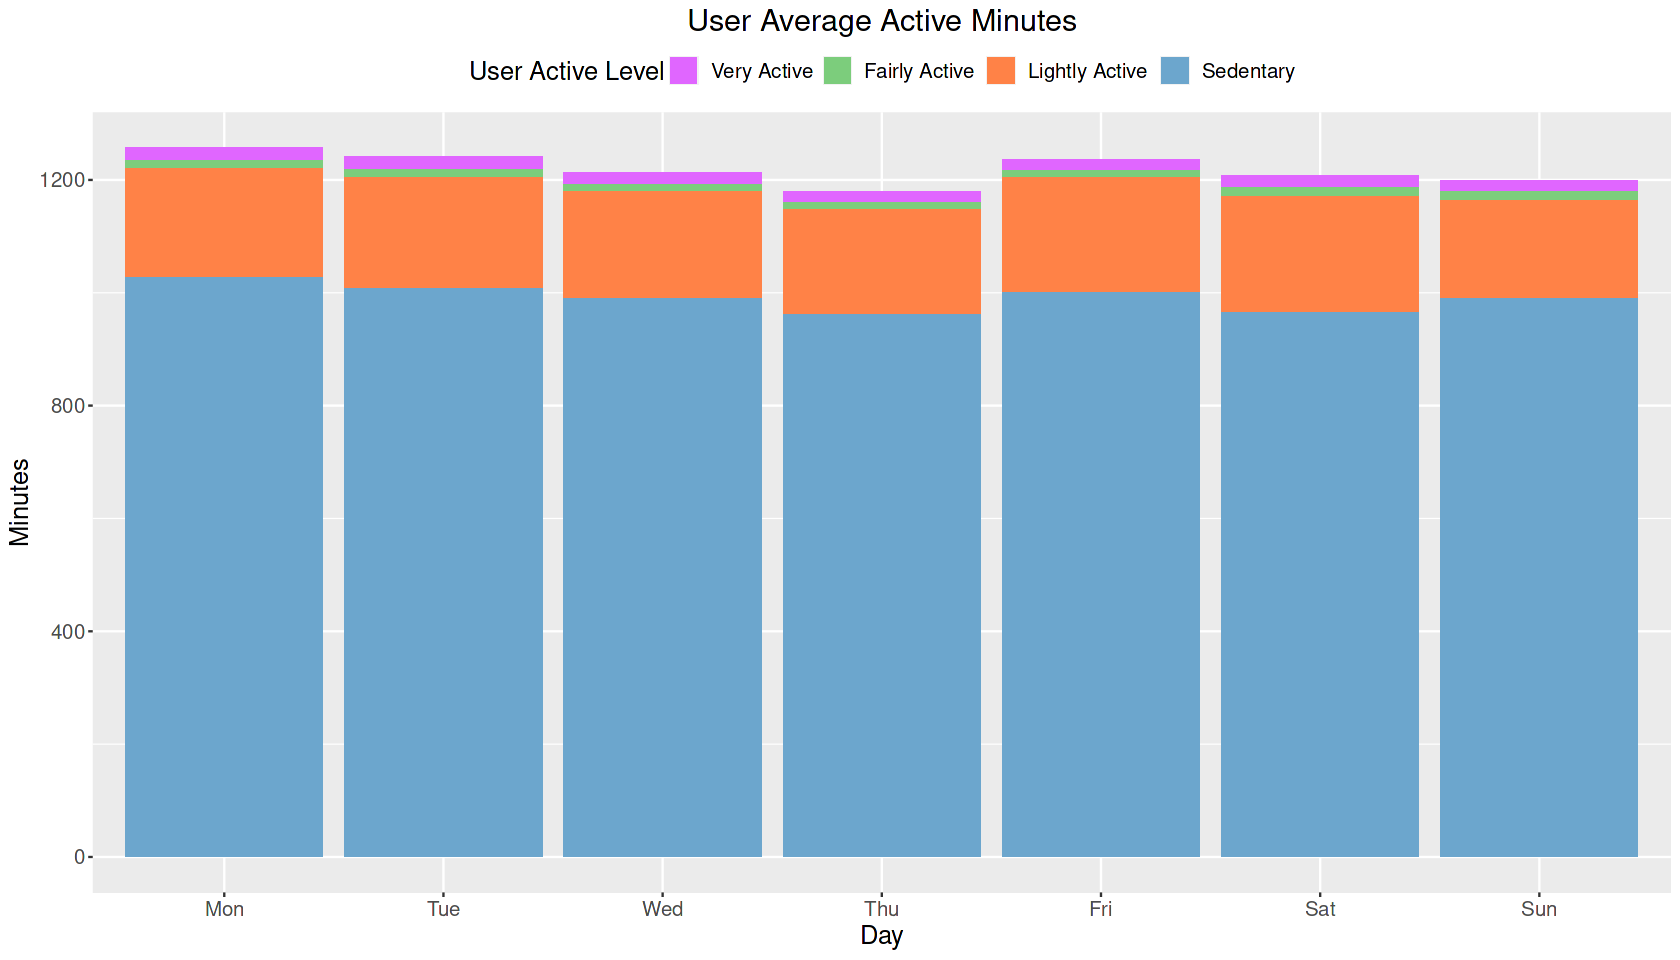

In [23]:
options(repr.plot.width = 14, repr.plot.height = 8)
user_activity %>%
    group_by(day_of_week) %>%
    summarize(avg_very_active = mean(very_active_minutes),
              fairly_active = mean(fairly_active_minutes),
              lightly_active = mean(lightly_active_minutes),
              sedentary = mean(sedentary_minutes)) %>%
    pivot_longer(!day_of_week, names_to = "active_level", values_to = "active_minutes") %>%
    ggplot(aes(day_of_week,active_minutes,fill=active_level)) +
    geom_col()+
    scale_fill_manual(labels = c("Very Active", "Fairly Active", "Lightly Active", "Sedentary"), 
                      values = c("mediumorchid1", "palegreen3", "sienna1", "skyblue3")) +
    labs(title = "User Average Active Minutes", x="Day", y="Minutes", fill= "User Active Level") +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15), legend.position = "top")



Key takeaways:
- The average active minutes of users is about 1200 minutes or 20 hours a day
- There are slightly different in the average active minutes throughout a week
- Sedentary minutes have the hihgest minutes of active minutes

### Average Steps, Calories and Sleep
In this step, I will see the average steps, calories and sleep each day.

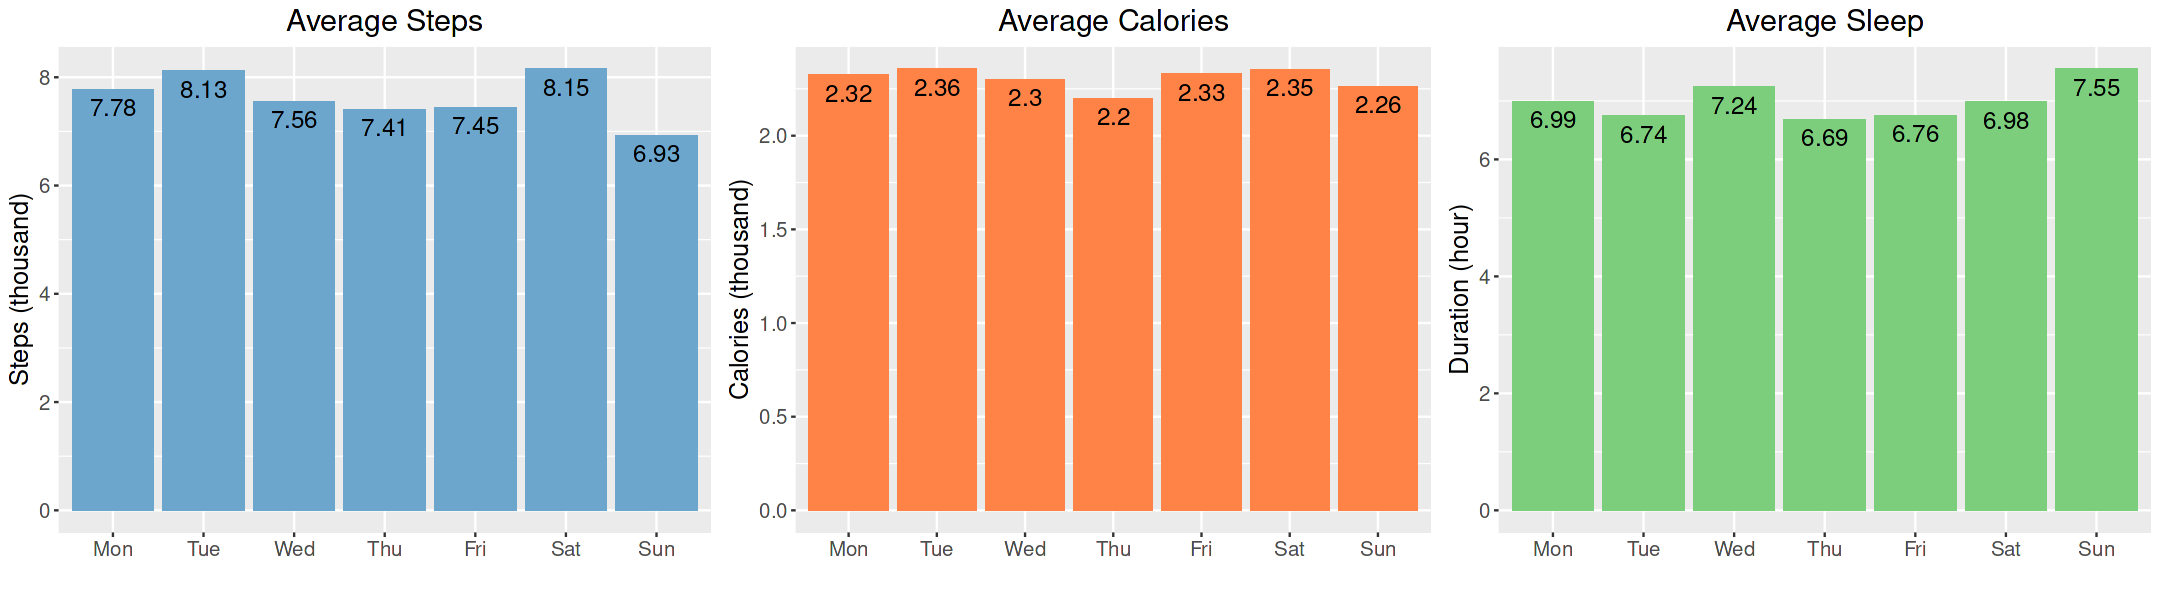

In [24]:
options(repr.plot.width = 18, repr.plot.height = 5)
grid.arrange(
    user_activity %>%
        group_by(day_of_week) %>%
        summarize(avg_steps = mean(total_steps)/1000) %>%
        ggplot(aes(day_of_week, avg_steps)) +
        geom_col(fill="skyblue3") +
        geom_text(aes(label = round(avg_steps,2)),size = 5, vjust=1.5) +
        labs(title = "Average Steps", x="", y="Steps (thousand)") +
        theme(plot.title = element_text(hjust=0.5), text = element_text(size=15)),
    
    user_activity %>%
        group_by(day_of_week) %>%
        summarize(avg_calories = mean(calories)/1000) %>%
        ggplot(aes(day_of_week, avg_calories)) +
        geom_col(fill="sienna1") +
        geom_text(aes(label = round(avg_calories,2)),size = 5, vjust=1.5) +
        labs(title = "Average Calories", x="", y="Calories (thousand)") +
        theme(plot.title = element_text(hjust=0.5), text = element_text(size=15)),

    user_activity %>%
        filter(total_minutes_asleep > 0) %>%
        group_by(day_of_week) %>%
        summarize(avg_sleep = mean(total_minutes_asleep)/60) %>%
        ggplot(aes(day_of_week, avg_sleep)) +
        geom_col(fill="palegreen3") +
        geom_text(aes(label = round(avg_sleep,2)),size = 5, vjust=1.5) +
        labs(title = "Average Sleep", x="", y="Duration (hour)") +
        theme(plot.title = element_text(hjust=0.5), text = element_text(size=15)),
    ncol=3
)


Key takeaways:
- The average steps, calories and sleep have slightly difference within a week
- Tuesday and Saturday become the most active day with the highest average steps and calories.
- Wednesday and Sunday have the highest average sleep time.

## Correlation 
The data above showed that they have a slightly different within a week. I want to look if there is any correlation between variables.

### Daily steps with calories, sleep and intensity

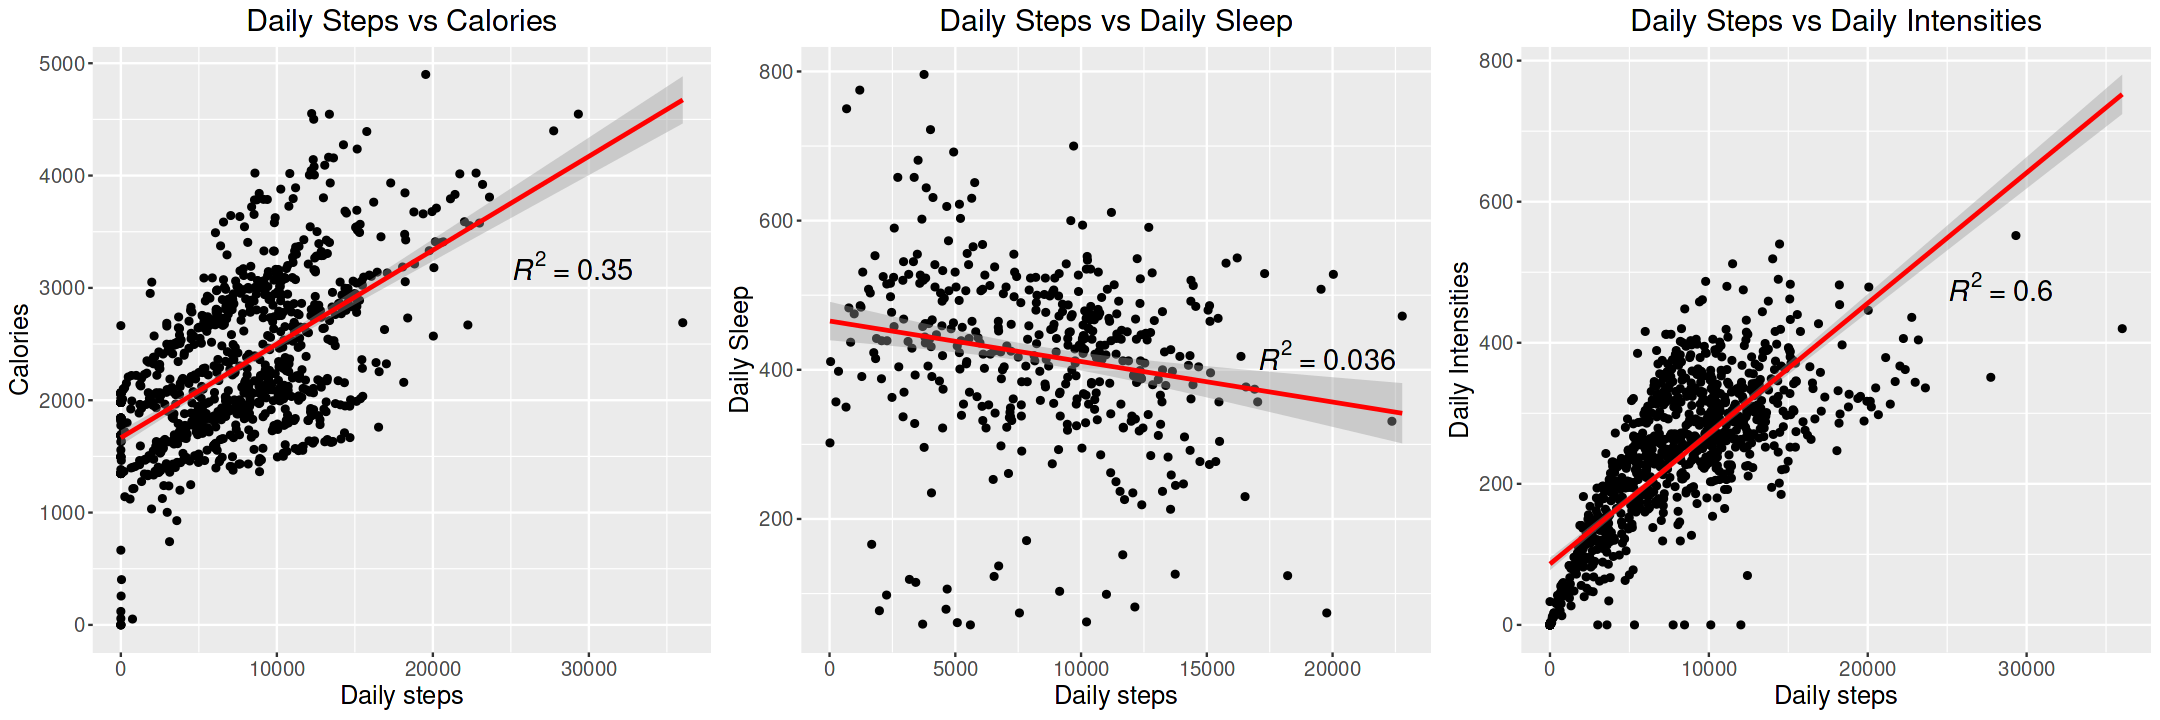

In [25]:
options(repr.plot.width = 18, repr.plot.height = 6)

grid.arrange(
    ggplot(user_activity,aes(x=total_steps, y=calories)) +
    geom_point() +
    geom_smooth(method = lm, formula = y~x, color = "red") +
    labs(title = "Daily Steps vs Calories", x = "Daily steps", y= "Calories") +
    theme(plot.title = element_text(hjust=0.5), text = element_text(size=15)) +
    stat_cor(aes(label = paste(..rr.label.., sep = "~`,`~")), label.x = 25000, label.y = 3200, size = 6),

    user_activity %>%
    filter(total_minutes_asleep > 0) %>%
    ggplot(aes(x=total_steps, y=total_minutes_asleep)) +
    geom_point() +
    geom_smooth(method = lm, formula = y~x, color = "red") +
    labs(title = "Daily Steps vs Daily Sleep", x = "Daily steps", y= "Daily Sleep") +
    theme(plot.title = element_text(hjust=0.5), text = element_text(size=15)) +
    stat_cor(aes(label = paste(..rr.label.., sep = "~`,`~")), label.x = 17000, label.y = 420, size = 6),
    
    user_activity %>%
    mutate(total_active_minute = lightly_active_minutes + fairly_active_minutes + very_active_minutes) %>%
    ggplot(aes(x=total_steps, y=total_active_minute)) +
    geom_point() +
    geom_smooth(method = lm, formula = y~x, color = "red") +
    labs(title = "Daily Steps vs Daily Intensities", x = "Daily steps", y= "Daily Intensities") +
    theme(plot.title = element_text(hjust=0.5), text = element_text(size=15)) +
    stat_cor(aes(label = paste(..rr.label.., sep = "~`,`~")), label.x = 25000, label.y = 480, size = 6),
    ncol=3
    )

Key takeaways:
* Daily steps have a high correlation with calories and daily intensities. However, there is no correlation between daily steps and daily sleep

### Weight to Intensity
From the dataset we have, we can see that not every user records their weight, so I decided to use the average of both data to compare.

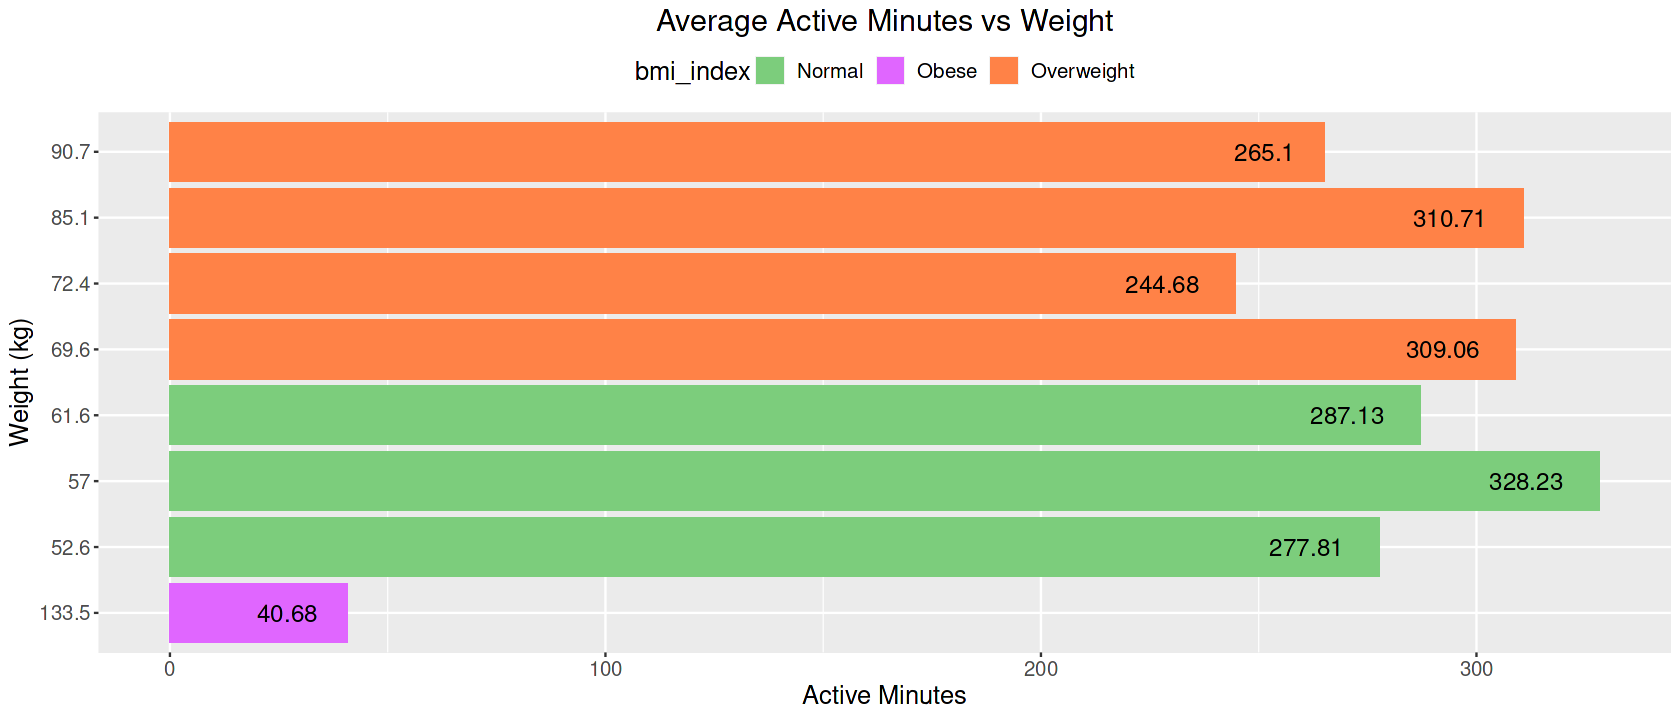

In [26]:
weight <- user_activity %>%
filter(weight_kg > 0) %>%
group_by(id) %>%
summarize(avg_weight = mean(weight_kg),
          avg_bmi = mean(bmi),
          bmi_index = case_when(avg_bmi < 18.5 ~ "Underweight",
                                avg_bmi < 25 ~ "Normal",
                                avg_bmi < 30 ~ "Overweight",
                                TRUE ~ "Obese"))

activity <- user_activity %>%
group_by(id) %>%
summarize(avg_active_minute = mean(lightly_active_minutes + fairly_active_minutes + very_active_minutes))

options(repr.plot.width = 14, repr.plot.height = 6)
merge(activity, weight) %>%
ggplot(aes(x = avg_active_minute,y = as.character(round(avg_weight,1)), fill = bmi_index)) +
geom_col() +
geom_text(aes(label = round(avg_active_minute,2)),size = 5, hjust=1.5) +
labs(title = "Average Active Minutes vs Weight", x="Active Minutes", y="Weight (kg)") +
scale_fill_manual(values = c("palegreen3", "mediumorchid1", "sienna1")) +
theme(plot.title = element_text(hjust=0.5), text = element_text(size=15), legend.position = "top")

Key takeaways:
* Users with normal BMI have more active minutes
* The intensity has an effect on body weight.

# Step 5: Share

Summary of findings:
* More than 85% of users tracked their activity over 20 days
* Only a fifth of users have reached 10,000 steps a day
* Most of the user activity is on a sedentary level
* There is no significant difference in average steps, calories and sleep within a week
* Daily steps have a correlation with daily intensities and calories. Meanwhile, there is no correlation between daily steps and daily sleep
* The intensity has an effect on body weight

# Step 6: Recommendation

1. Encourage users to be more active as the intensity of activity could affect healthy weight.
2. Provide some challenge features or competition with another user that could boost the motivation of users.
3. Improve the notification feature to remind the user to reach the target and increase the total number of steps a day.